# From Screen Time to Battery Drain

A thorough examination of mobile device usage trends and user behaviour classification across devices. This dataset contains information about how consumers interact with their devices, including measures like app usage time, screen-on time, battery depletion, and data consumption. By investigating these variables, we hope to identify patterns and trends that can help with app development, device optimization, and user behavior modeling.

# Getting Started

## Purpose of This Notebook

This notebook seeks to provide a thorough examination of the trends and patterns identified in mobile device usage and user behavior. By viewing and evaluating these information, we hope to gain insights into app development methods, device optimization, and user behavior modeling. Whether you're a data scientist, app developer, or mobile device manufacturer, this analysis can help you better understand how people interact with their devices and how to improve their experience.

## Your Feedback Matters

Your feedback is crucial to me as I work to become a better data scientist. If you have any recommendations for improving this analysis, please leave a comment. Your constructive criticism will help me improve my skills and provide more impactful insights.

## Show Your Support

If you find this notebook informative and useful, I kindly ask for your support by upvoting it. Your encouragement motivates me to continue refining my work and contributing to the data science community.

Lastly, I appreciate your time and attention. Let's go on this adventure together to discover the complex world of mobile device usage and user behavior. Thank you for taking part in this learning session.

# Importing Libraries, Preferences, and Helper Functions

## Importing Libraries

In [6]:
# System
import warnings

# Data manipulation
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Preferences

In [7]:
# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Set the default Seaborn style
sns.set_theme(style='whitegrid', font='serif')

## Helper Functions

- Classify user behavior

In [8]:
# Define a function to classify user behavior
def classify_user_behavior(row):
    if (row['app_usage_time'] < 100) and (row['screen_on_time'] < 2) and (row['battery_drain'] < 700) and (row['data_usage'] < 300):
        return 'Light Usage'
    elif (100 <= row['app_usage_time'] < 200) and (2 <= row['screen_on_time'] < 4) and (700 <= row['battery_drain'] < 1500) and (300 <= row['data_usage'] < 800):
        return 'Moderate Usage'
    elif (200 <= row['app_usage_time'] < 300) and (4 <= row['screen_on_time'] < 6) and (1500 <= row['battery_drain'] < 2000) and (800 <= row['data_usage'] < 1300):
        return 'Regular Usage'
    elif (300 <= row['app_usage_time'] < 400) and (6 <= row['screen_on_time'] < 8) and (2000 <= row['battery_drain'] < 2500) and (1300 <= row['data_usage'] < 2000):
        return 'High Usage'
    else:
        return 'Extreme Usage'

# The Data

In [9]:
# Load the dataset
data = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')

# Preview the dataset, first 5 records
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
# Preview the dataset, last 5 records
data.tail()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1
699,700,OnePlus 9,Android,212,5.4,1306,49,828,23,Female,3


# EDA: Overview

In [11]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


- `User ID`: Unique identifier for each user.
- `Device Model`: Model of the user's smartphone.
- `Operating System`: The OS of the device (iOS or Android).
- `App Usage Time (min/day)`: Daily time spent on mobile applications, measured in minutes.
- `Screen On Time (hours/day)`: Average hours per day the screen is active.
- `Battery Drain (mAh/day)`: Daily battery consumption in mAh.
- `Number of Apps Installed`: Total apps available on the device.
- `Data Usage (MB/day`: Daily mobile data consumption in megabytes.
- `Age`: Age of the user.
- `Gender`: Gender of the user (Male or Female).
- `User Behavior Class`: Classification of user behavior based on usage patterns (1 to 5).

In [12]:
# Preview number of unique values
data.nunique().to_frame(name="Number of Unique Values")

,Number of Unique Values
User ID,700
Device Model,5
Operating System,2
App Usage Time (min/day),387
Screen On Time (hours/day),108
Battery Drain (mAh/day),628
Number of Apps Installed,86
Data Usage (MB/day),585
Age,42
Gender,2


In [13]:
# Dataset shape; rows, columns
data.shape

(700, 11)

In [14]:
# Preview the number of duplicated records
data.duplicated().sum()

0

In [15]:
# Preview the number of NULL values
data.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [16]:
# Dataset's statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


# Data Cleaning


## Clean Column Names

In [17]:
# Convert to lowercase
data.columns = data.columns.str.lower()

# Replace spaces with underscores
data.columns = data.columns.str.replace(' ', '_')

# Remove parentheses and their contents
data.columns = data.columns.str.replace(r'\(.*?\)', '', regex=True)

# Remove trailing underscores
data.columns = data.columns.str.strip('_')

## Remove Column(s)

In [18]:
data = data.drop(columns=['user_id', 'user_behavior_class'])

In [19]:
# Preview the cleaned data
data.head()

,device_model,operating_system,app_usage_time,screen_on_time,battery_drain,number_of_apps_installed,data_usage,age,gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female


In [20]:
# Preview only columns
data.columns

Index(['device_model', 'operating_system', 'app_usage_time', 'screen_on_time',
       'battery_drain', 'number_of_apps_installed', 'data_usage', 'age',
       'gender'],
      dtype='object')

## Add new Column(s)

In [21]:
# Apply `classify_user_behavior` function
data['user_behavior_class'] = data.apply(classify_user_behavior, axis=1)

In [22]:
# Preview updated data
data.head()

,device_model,operating_system,app_usage_time,screen_on_time,battery_drain,number_of_apps_installed,data_usage,age,gender,user_behavior_class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,Extreme Usage
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,Extreme Usage
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,Extreme Usage
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,Regular Usage
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,Extreme Usage


# EDA: Visualization

## Distribution of User Behavior Classes

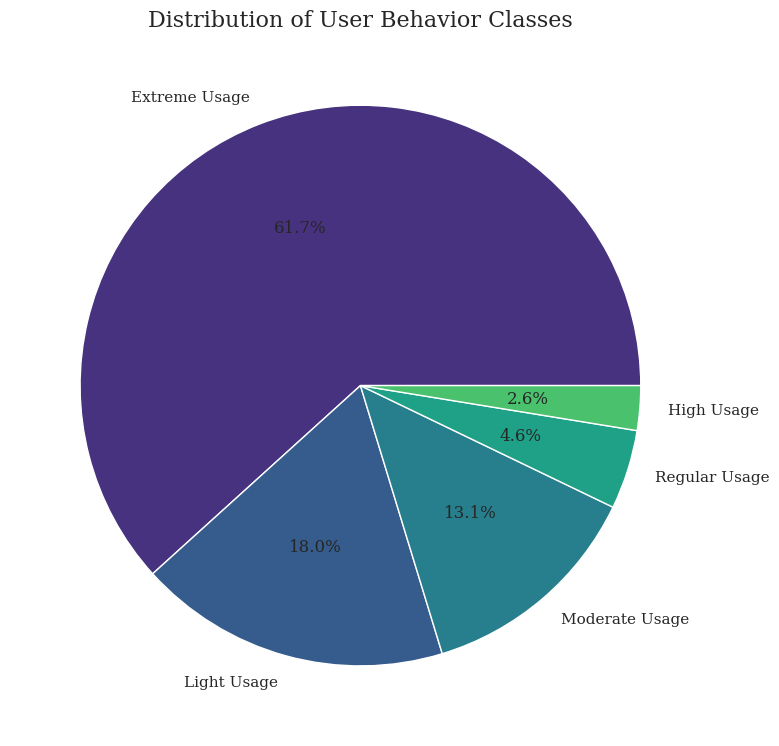

In [23]:
# Set the figure size
plt.figure(figsize=(8, 8))

# Count the number of users in each behavior class
behavior_counts = data['user_behavior_class'].value_counts()

# Create a pie chart
plt.pie(behavior_counts, labels=behavior_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))

# Set the title of the plot
plt.title('Distribution of User Behavior Classes', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

The pie chart reveals a highly imbalanced distribution of user behavior classes, with the majority of users classified as "Extreme Usage." This suggests that the dataset is dominated by heavy users, while light users are underrepresented. The findings highlight the need for further analysis to understand the factors contributing to extreme usage and to ensure that the classification thresholds are appropriate for the dataset.



## Distribution of App Usage Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['app_usage_time'], bins=20, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of App Usage Time', fontsize=16)
plt.xlabel('App Usage Time (minutes/day)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The histogram of app usage time reveals a bimodal distribution, with two distinct groups of users: those with low to moderate usage (around 100–150 minutes/day) and those with high usage (around 400–450 minutes/day). The distribution is right-skewed, with a few outliers showing excessive usage. This pattern suggests that the dataset includes both casual and heavy users, providing valuable insights for app developers and mobile device manufacturers.

## Distribution of Screen On Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['screen_on_time'], bins=20, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Screen On Time', fontsize=16)
plt.xlabel('Screen On Time (hours/day)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The histogram of screen-on time reveals a unimodal distribution with a central peak around **4–6 hours/day**. Most users fall into a moderate range of screen-on time, with a smaller number of users at the extremes (very low or very high). The distribution is right-skewed, with a few outliers showing excessive screen-on time. This pattern suggests that the dataset includes both casual and heavy users, providing valuable insights for mobile device manufacturers and app developers.


## Distribution of Battery Drain

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram
sns.histplot(data['battery_drain'], bins=20, kde=True, color='skyblue')

# Set the title and labels
plt.title('Distribution of Battery Drain', fontsize=16)
plt.xlabel('Battery Drain (mAh/day)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The histogram of battery drain reveals a unimodal distribution with a central peak around **1000–1500 mAh/day**. Most users fall into a moderate range of battery drain, with a smaller number of users at the extremes (very low or very high). The distribution is right-skewed, with a few outliers showing excessive battery drain. This pattern suggests that the dataset includes both casual and heavy users, providing valuable insights for mobile device manufacturers and app developers.


## App Usage Time vs. Screen On Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='app_usage_time', y='screen_on_time', hue='user_behavior_class', data=data, palette='viridis')

# Set the title and labels
plt.title('App Usage Time vs. Screen On Time', fontsize=16)
plt.xlabel('App Usage Time (minutes/day)', fontsize=12)
plt.ylabel('Screen On Time (hours/day)', fontsize=12)

# Add legend title
plt.legend(title='User Behavior Class')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The scatter plot of app usage time vs. screen-on time reveals a positive correlation between the two variables, with users who spend more time using apps also keeping their screens on for longer periods. The data points are clustered by user behavior class, with the **Extreme Usage** group showing the highest app usage time and screen-on time. The plot provides valuable insights for mobile device manufacturers and app developers, highlighting the need to optimize performance and efficiency for users across different usage levels.

## Battery Drain vs. Data Usage

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='battery_drain', y='data_usage', hue='user_behavior_class', data=data, palette='coolwarm')

# Set the title and labels
plt.title('Battery Drain vs. Data Usage', fontsize=16)
plt.xlabel('Battery Drain (mAh/day)', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)

# Add legend title
plt.legend(title='User Behavior Class')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The scatter plot of battery drain vs. data usage reveals a positive correlation between the two variables, with users who consume more battery also using more mobile data. The data points are clustered by user behavior class, with the **Extreme Usage** group showing the highest battery drain and data usage. The plot provides valuable insights for mobile device manufacturers and app developers, highlighting the need to optimize performance and efficiency for users across different usage levels.

## Number of Apps Installed vs. App Usage Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='number_of_apps_installed', y='app_usage_time', hue='user_behavior_class', data=data, palette='coolwarm')

# Set the title and labels
plt.title('Number of Apps Installed vs. App Usage Time', fontsize=16)
plt.xlabel('Number of Apps Installed', fontsize=12)
plt.ylabel('App Usage Time (minutes/day)', fontsize=12)

# Add legend title
plt.legend(title='User Behavior Class')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The scatter plot of the number of apps installed vs. app usage time reveals a positive correlation between the two variables, with users who have more apps installed spending more time using their devices. The data points are clustered by user behavior class, with the **Extreme Usage** group showing the highest number of apps installed and app usage time. The plot provides valuable insights for mobile device manufacturers and app developers, highlighting the need to optimize performance and efficiency for users across different usage levels.

## Gender vs. App Usage Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='gender', y='app_usage_time', data=data, palette='Set2')

# Set the title and labels
plt.title('Gender vs. App Usage Time', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('App Usage Time (minutes/day)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The box plot of gender vs. app usage time reveals that male and female users have similar median app usage times, with comparable variability and ranges. Both genders exhibit a range of app usage behaviors, from low to high, with a few outliers showing exceptionally high app usage time. The plot suggests that there is no significant difference in app usage time between genders, providing valuable insights for app developers and mobile device manufacturers.

## Age vs. Data Usage

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='age', y='data_usage', hue='user_behavior_class', data=data, palette='viridis')

# Set the title and labels
plt.title('Age vs. Data Usage', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Data Usage (MB/day)', fontsize=12)

# Add legend title
plt.legend(title='User Behavior Class')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The scatter plot of age vs. data usage reveals that there is no strong linear correlation between the two variables. However, data usage tends to increase with age up to a certain point (around 50 years), after which it may plateau or slightly decrease. The data points are clustered by user behavior class, with the **Extreme Usage** group showing the highest data usage, particularly in the middle to older age groups (30–60 years). The plot provides valuable insights for app developers, highlighting the need to optimize performance for middle-aged users who are more likely to have higher data usage.


## Operating System vs. Battery Drain

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='operating_system', y='battery_drain', data=data, palette='Set1')

# Set the title and labels
plt.title('Operating System vs. Battery Drain', fontsize=16)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The box plot of operating system vs. battery drain reveals that Android and iOS users have similar median battery drain, with comparable variability and ranges. Both operating systems exhibit a range of battery drain behaviors, from low to high, with a few outliers showing exceptionally high battery drain. The plot suggests that there is no significant difference in battery drain between operating systems, providing valuable insights for mobile device manufacturers and app developers.



## Gender vs. Screen On Time

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='gender', y='screen_on_time', data=data, palette='Set3')

# Set the title and labels
plt.title('Gender vs. Screen On Time', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Screen On Time (hours/day)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

The box plot of gender vs. screen-on time reveals that male and female users have similar median screen-on times, with comparable variability and ranges. Both genders exhibit a range of screen-on time behaviors, from low to high, with a few outliers showing exceptionally high screen-on time. The plot suggests that there is no significant difference in screen-on time between genders, providing valuable insights for app developers and mobile device manufacturers.


## Device Model Popularity

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Count the number of users for each device model
device_counts = data['device_model'].value_counts().head(10)

# Create a bar plot
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis', ci=None)

# Set the title and labels
plt.title('Device Model Popularity', fontsize=16)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations at the top of each bar
for i, count in enumerate(device_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.tight_layout()
plt.show()

## Correlation Heatmap

In [ ]:
# Select only the numeric columns for correlation
numeric_data = data.select_dtypes(include=[float, int])

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a correlation matrix
corr = numeric_data.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Set the title
plt.title('Correlation Heatmap', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

The correlation heatmap reveals strong positive correlations among the usage metrics (`app_usage_time`, `screen_on_time`, `battery_drain`, `number_of_apps_installed`, and `data_usage`), indicating that these variables are closely related. The user ID and age have very weak correlations with other variables, suggesting that they do not significantly influence usage patterns. The heatmap provides valuable insights for app developers and mobile device manufacturers, highlighting the need to optimize performance for users with high usage metrics.